In [3]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv(r"Datos\diabetes.csv")

Analisis de los datos

Porcentage de datos faltantes 

In [5]:
porcentaje_ceros = (df.eq(0).sum() / len(df)) * 100
print(porcentaje_ceros)

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64


Se decide tomar dos caminos 

Coregir datos faltantes por los promedios

In [6]:
correciones = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in correciones:
    media= df[col][df[col] != 0].mean()
    df[col] = df[col].replace(0, media)
df = df.round(2)
df.to_csv(r"Datos\diabetes_corregido.csv", index=False)

##Eliminar las filas con datos faltantes en las columnas donde falten muchos y hacer promedio del resto 

In [7]:
correciones = ["Glucose", "BloodPressure", "BMI"]

for col in correciones:
    media= df[col][df[col] != 0].mean()
    df[col] = df[col].replace(0, media)
df = pd.read_csv(r"Datos\diabetes.csv")
df = df[df["Insulin"] != 0]
df = df[df["SkinThickness"] != 0]
df = df.round(2)
df.to_csv(r"Datos\diabetes_limpios.csv", index=False)

##Lectura de todos los .csv para su rpoximo uso 

In [8]:
# csv original
df = pd.read_csv(r"Datos\diabetes.csv")
# csv con promedios 
df_c = pd.read_csv(r"Datos\diabetes_corregido.csv")
# csv con datos eliminados  
df_l = pd.read_csv(r"Datos\diabetes_limpios.csv")


##Visualizar información general de los df 

In [9]:
print("_______________DF______________")
print("___Columnas___")
print(df.columns)
print("___Head___")
print(df.head())
print("___Info___")
print(df.info())

_______________DF______________
___Columnas___
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
___Head___
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
___Info___
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
D

In [10]:
print("__________DF COREGIDO__________")
print("___Columnas___")
print(df_c.columns)
print("___Head___")
print(df_c.head())
print("___Info___")
print(df_c.info())

__________DF COREGIDO__________
___Columnas___
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
___Head___
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0          35.00   155.55  33.6   
1            1     85.0           66.0          29.00   155.55  26.6   
2            8    183.0           64.0          29.15   155.55  23.3   
3            1     89.0           66.0          23.00    94.00  28.1   
4            0    137.0           40.0          35.00   168.00  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1  
___Info___
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
D

In [11]:
print("___________DF LIMPIO___________")
print("___Columnas___")
print(df_l.columns)
print("___Head___")
print(df_l.head())
print("___Info___")
print(df_l.info())

___________DF LIMPIO___________
___Columnas___
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
___Head___
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       89             66             23       94  28.1   
1            0      137             40             35      168  43.1   
2            3       78             50             32       88  31.0   
3            2      197             70             45      543  30.5   
4            1      189             60             23      846  30.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.17   21        0  
1                      2.29   33        1  
2                      0.25   26        1  
3                      0.16   53        1  
4                      0.40   59        1  
___Info___
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
D

##Matris de correlación y mapamas de calor para comparar resultados 

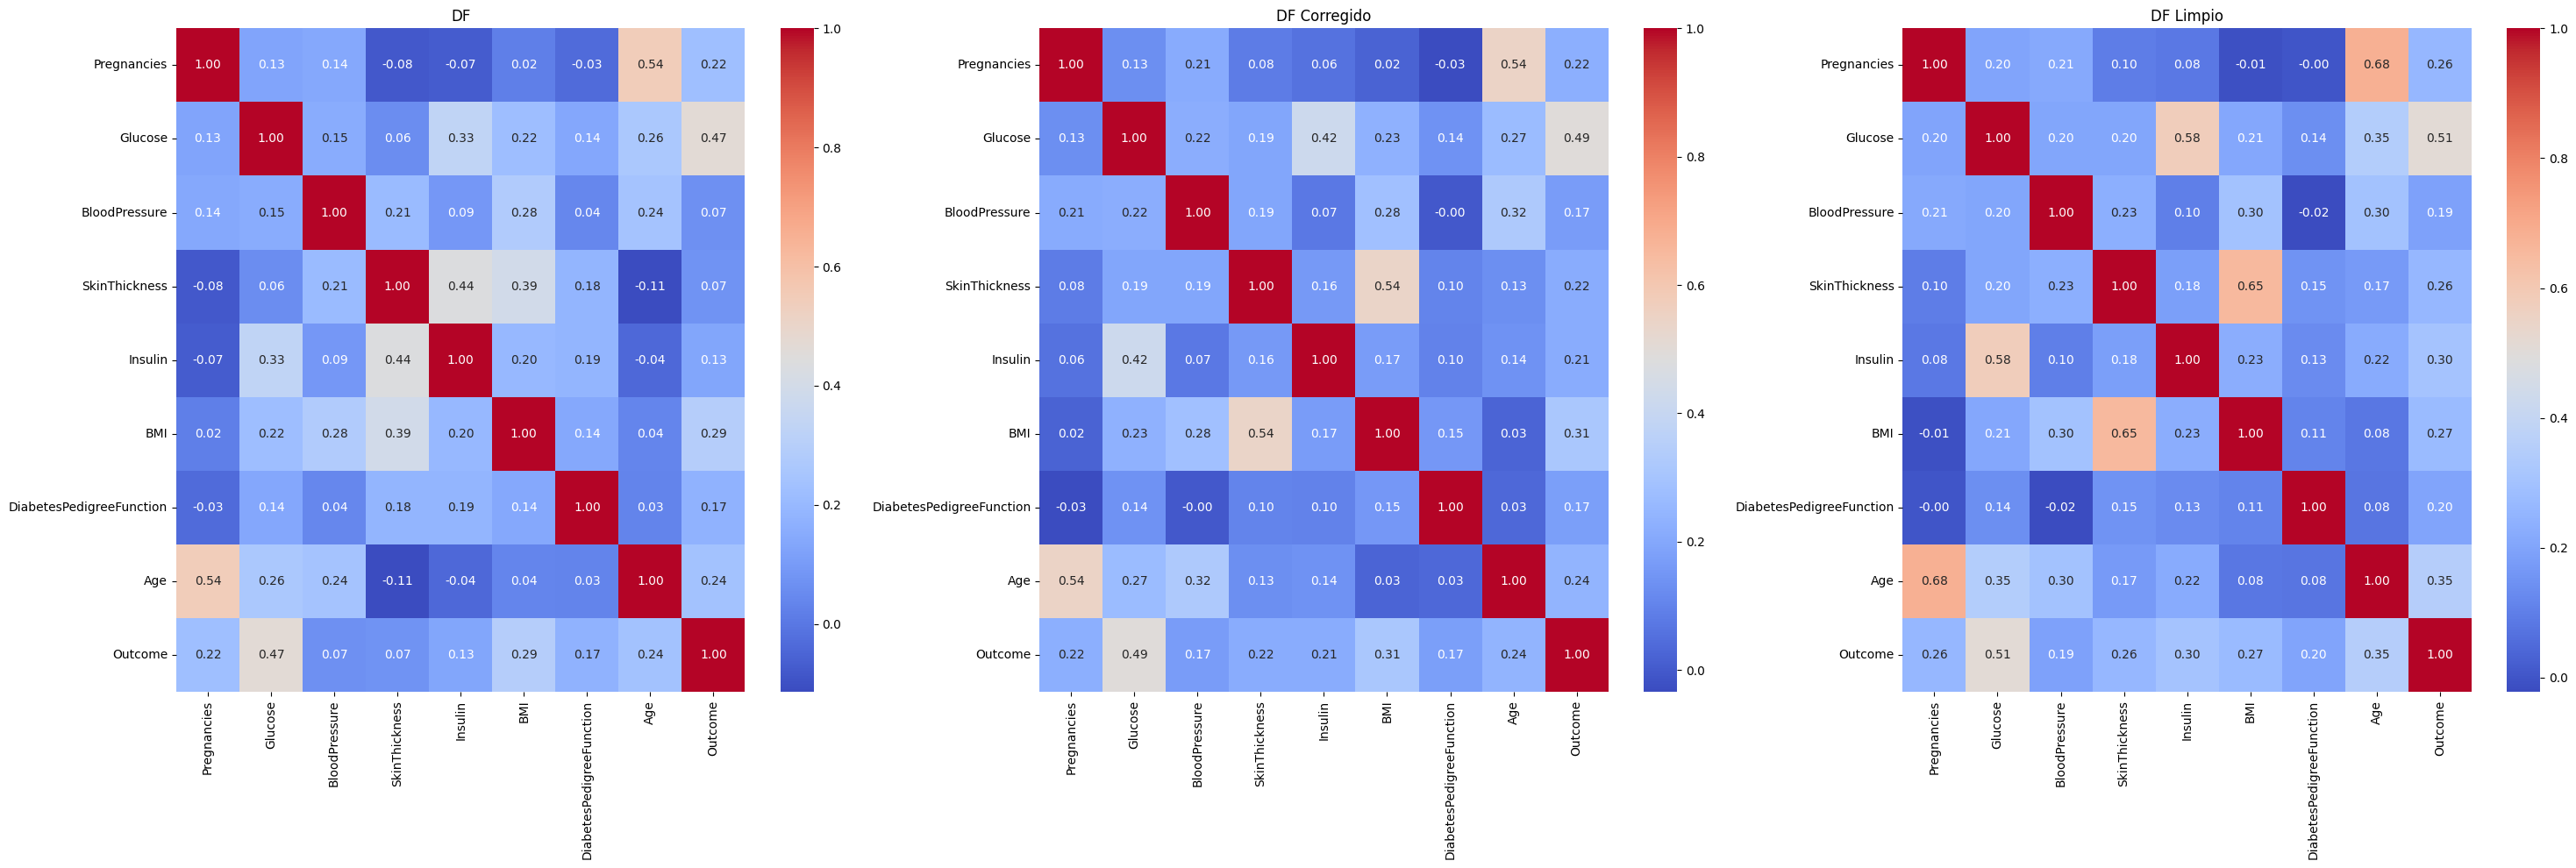

In [12]:
df_lista = [df, df_c, df_l]
titulos = ["DF", "DF Corregido", "DF Limpio"]

plt.figure(figsize=(30, 10))

for i, df_actual in enumerate(df_lista, 1): 
    plt.subplot(1, 3, i)  
    sns.heatmap(df_actual.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(titulos[i - 1])
plt.tight_layout()
plt.show()

A partir de aquí se descarta el uso de del DF original por los datos faltantes, por otra parte, se continua con los otros dos para el modelo y otros analisis ya que no tienen muchas diferencias estadisticas hasta el momento.

##Histograma:

<Figure size 1000x1000 with 0 Axes>

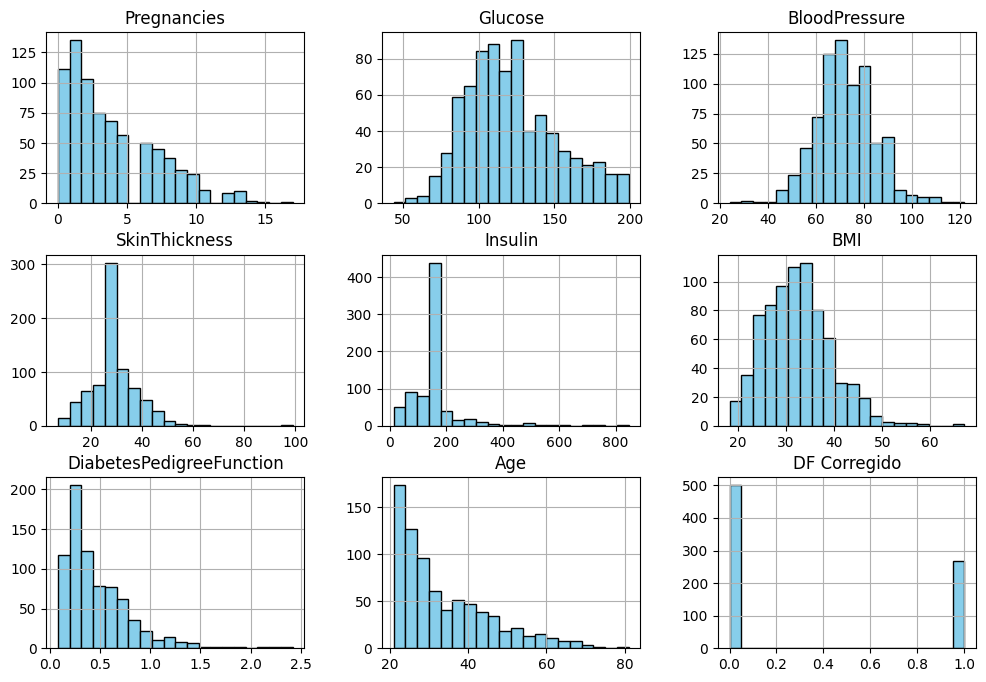

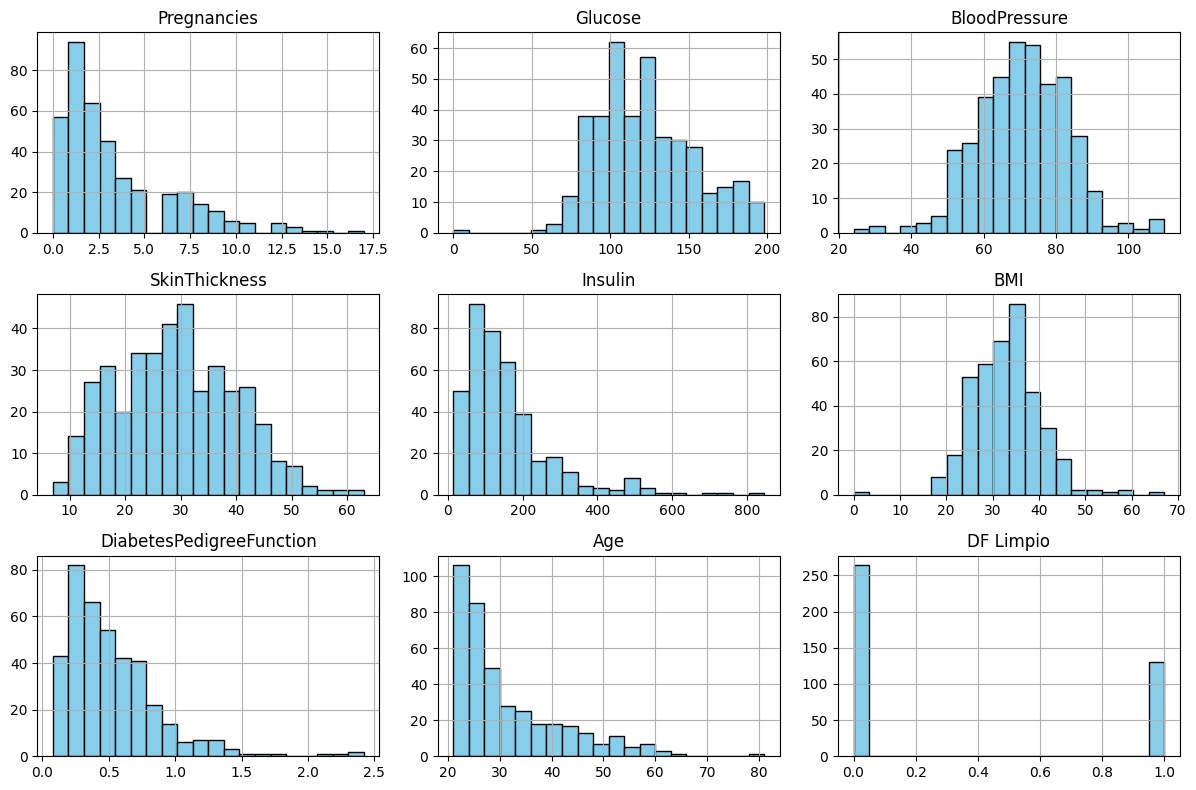

In [13]:
df_lista = [df_c, df_l]
titulos = ["DF Corregido", "DF Limpio"]

plt.figure(figsize=(10,10))

for i, df_actual in enumerate(df_lista, 1):
    df_actual.hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
    plt.title(titulos[i - 1])
plt.tight_layout()
plt.show()

Al cambiar tantos datos como la insulina y el grosor de la piel, que originalmente eran 0 (datos faltantes), por un promedio, estas dos representan un cambio muy grande en los graficos  

##Caja y Bigotes

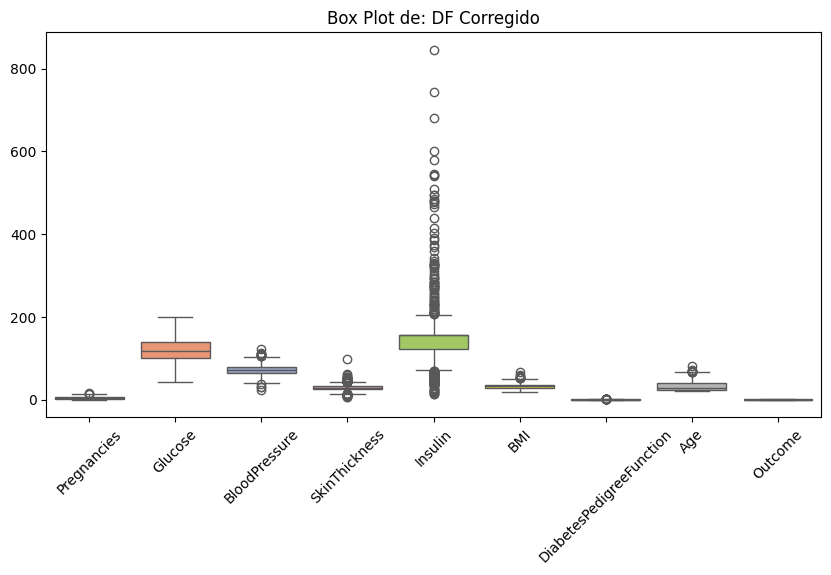

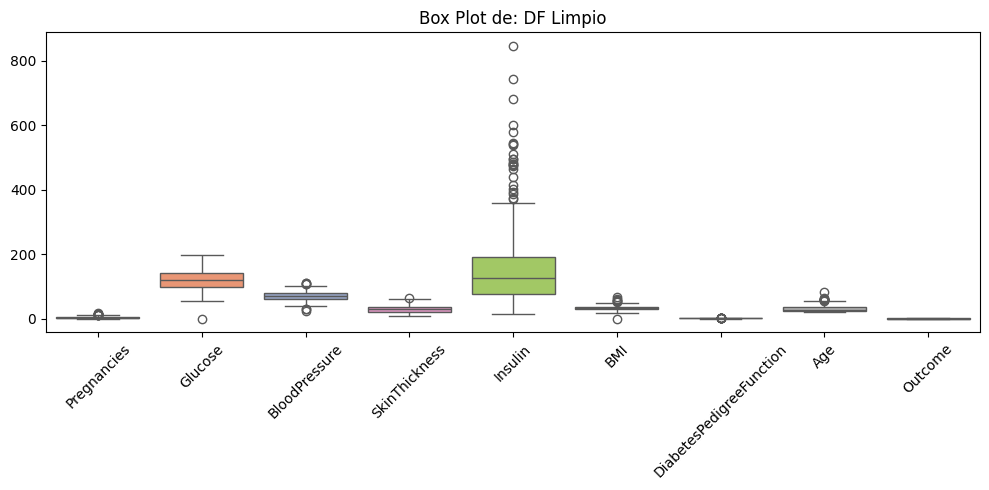

In [14]:
for i, df_actual in enumerate(df_lista, 1):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_actual, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Box Plot de: {titulos[i - 1]}")
plt.tight_layout()
plt.show()